<a href="https://colab.research.google.com/github/aaron34x/Proyect-Bussines-Analytics/blob/main/Combine_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Librerias
import pandas as pd 
import numpy as np

In [11]:
df_Trasnfermarkt=pd.read_csv("/content/Limpienza_data_Transfermarkt.csv")
df_Trasnfermarkt.drop(labels={'Unnamed: 0'},axis=1,inplace=True)
df_Kaggle=pd.read_csv('/content/limpienza_data_Kaggle.csv')
df_Kaggle.drop(labels={'Unnamed: 0'},axis=1,inplace=True)

In [12]:
df_Trasnfermarkt.head()

,Player,Club,Age,Position,Nation,Value,Contract Years Left,League,MP (20/21),Starts (20/21),...,Offsides (17/18),Crosses (17/18),Interceptions (17/18),Penalty Kicks Won (17/18),Penalties Conceded (17/18),Own Goals (17/18),Total Loose Balls Recovered (17/18),Aerial Duel Won (17/18),Aerial Duel Lost (17/18),% Aerial Duels Won (17/18)
0,KYLIAN MBAPPE,PARIS SAINT-GERMAIN,22,ATTACK,FRANCE,144000000,1,LIGUE 1,31.0,27.0,...,23.0,62.0,1.0,1.0,0.0,0.0,98.0,1.0,4.0,20.0
1,ERLING HAALAND,BORUSSIA DORTMUND,21,ATTACK,NORWAY,117000000,3,BUNDESLIGA,28.0,27.0,...,9.0,8.5,5.0,0.5,0.0,0.0,70.0,29.0,31.5,47.9
2,HARRY KANE,TOTTENHAM HOTSPUR,28,ATTACK,ENGLAND,108000000,3,PREMIER LEAGUE,35.0,35.0,...,43.0,24.0,7.0,1.0,0.0,0.0,124.0,69.0,111.0,38.3
3,JADON SANCHO,MANCHESTER UNITED,21,ATTACK,ENGLAND,90000000,5,PREMIER LEAGUE,26.0,24.0,...,1.0,15.0,6.0,0.0,0.0,0.0,57.0,3.0,14.0,17.6
4,MOHAMED SALAH,LIVERPOOL FC,29,ATTACK,EGYPT,90000000,2,PREMIER LEAGUE,37.0,34.0,...,18.0,50.0,13.0,1.0,0.0,0.0,219.0,19.0,58.0,24.7


In [13]:
df_Kaggle.head()

,PlayerName,Affiliation,League,Jersey,Age,birthPlace,Citizenship 1,Position,Position 2,Foot,Agent,ContractExpiration,nationality,Games Played,Market Value (Euros),Accumulated Transfer Sums (Euros),Highest Market Value (Euros),NationalTeamCaps,MostRecentInjury,Height (cm)
0,ANTHONY MODESTE,1. FC KOLN,BUNDESLIGA,#27,31,CANNES,FRANCE,FORWARD,CENTRE-FORWARD,RIGHT,NO AGENT,30.06.2023,FRANCE,1,7000000,45700000,20000000.0,16,0,187
1,BENNO SCHMITZ,1. FC KOLN,BUNDESLIGA,#2,25,MÜNCHEN,GERMANY,DEFENDER,RIGHT-BACK,RIGHT,KÖGL & PARTNER GMBH,30.06.2022,GERMANY,0,1000000,1000000,1750000.0,11,0,182
2,BIRGER VERSTRAETE,1. FC KOLN,BUNDESLIGA,#8,25,OOSTENDE,BELGIUM,MIDFIELDER,DEFENSIVE MIDFIELD,RIGHT,SPORTPLUS FOOTBALL ...,30.06.2023,BELGIUM,0,4000000,4850000,4000000.0,1,0,175
3,BRADY SCOTT,1. FC KOLN,BUNDESLIGA,#31,20,"PETALUMA, CALIFORNIA",UNITED STATES,GOALKEEPER,GOALKEEPER,RIGHT,PRO FC,30.06.2021,UNITED STATES,14,100000,0,100000.0,0,0,187
4,CHRISTIAN CLEMENS,1. FC KOLN,BUNDESLIGA,#17,28,KÖLN,GERMANY,MIDFIELDER,RIGHT MIDFIELD,RIGHT,DC INTERNATIONAL ...,30.06.2021,GERMANY,15,1750000,7950000,3500000.0,5,0,179


In [ ]:
# Dado que los datos de trasnfermarkt y lo datos de kaggle hay varibles repetidas,
# solamente vamos a tomar las variables de, :PlayerName, Foot, NationalTeamCaps,MostRecentInjury ,Height (cm)
# y el primary key para unir las bases de datos es PlayerName

In [14]:
df_Kaggle_1=df_Kaggle[['PlayerName','Foot','NationalTeamCaps','MostRecentInjury','Height (cm)']]
df_Kaggle_1.head()

,PlayerName,Foot,NationalTeamCaps,MostRecentInjury,Height (cm)
0,ANTHONY MODESTE,RIGHT,16,0,187
1,BENNO SCHMITZ,RIGHT,11,0,182
2,BIRGER VERSTRAETE,RIGHT,1,0,175
3,BRADY SCOTT,RIGHT,0,0,187
4,CHRISTIAN CLEMENS,RIGHT,5,0,179


In [21]:
data_union=pd.merge(df_Trasnfermarkt, df_Kaggle_1 , how='inner',left_on='Player', right_on='PlayerName')
# Se elimina la variable de PlayerName, la cual fue la primary key para poder unir las dos bases de datos
# con Player, y solamente se deja una varible para evitar, columnas repetidas.
data_union.drop(labels=['PlayerName'],axis=1)
data_union

,Player,Club,Age,Position,Nation,Value,Contract Years Left,League,MP (20/21),Starts (20/21),...,Own Goals (17/18),Total Loose Balls Recovered (17/18),Aerial Duel Won (17/18),Aerial Duel Lost (17/18),% Aerial Duels Won (17/18),PlayerName,Foot,NationalTeamCaps,MostRecentInjury,Height (cm)
0,KYLIAN MBAPPE,PARIS SAINT-GERMAIN,22,ATTACK,FRANCE,144000000,1,LIGUE 1,31.0,27.0,...,0.0,98.0,1.0,4.0,20.00,KYLIAN MBAPPE,RIGHT,33,0,178
1,HARRY KANE,TOTTENHAM HOTSPUR,28,ATTACK,ENGLAND,108000000,3,PREMIER LEAGUE,35.0,35.0,...,0.0,124.0,69.0,111.0,38.30,HARRY KANE,RIGHT,43,0,188
2,JADON SANCHO,MANCHESTER UNITED,21,ATTACK,ENGLAND,90000000,5,PREMIER LEAGUE,26.0,24.0,...,0.0,57.0,3.0,14.0,17.60,JADON SANCHO,RIGHT,11,0,180
3,MOHAMED SALAH,LIVERPOOL FC,29,ATTACK,EGYPT,90000000,2,PREMIER LEAGUE,37.0,34.0,...,0.0,219.0,19.0,58.0,24.70,MOHAMED SALAH,LEFT,67,0,175
4,NEYMAR,PARIS SAINT-GERMAIN,29,ATTACK,BRAZIL,90000000,4,LIGUE 1,18.0,15.0,...,0.0,110.0,2.0,2.0,50.00,NEYMAR,RIGHT,102,1,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,FRANCESCO MAGNANELLI,US SASSUOLO,36,MIDFIELD,ITALY,360000,1,SERIE A,10.0,7.0,...,0.0,443.0,27.0,22.0,55.10,FRANCESCO MAGNANELLI,RIGHT,0,0,182
1283,QUINI,GRANADA CF,31,DEFENDER,SPAIN,360000,2,LA LIGA,19.0,12.0,...,0.0,99.0,16.0,8.5,62.85,QUINI,RIGHT,0,0,178
1284,FEDERICO PELUSO,US SASSUOLO,37,DEFENDER,ITALY,360000,1,SERIE A,7.0,2.0,...,0.0,197.0,51.0,22.0,69.90,FEDERICO PELUSO,LEFT,3,0,188
1285,PHIL BARDSLEY,BURNLEY FC,36,DEFENDER,SCOTLAND,270000,1,PREMIER LEAGUE,4.0,3.0,...,0.0,141.0,27.0,32.0,45.80,PHIL BARDSLEY,RIGHT,13,0,180


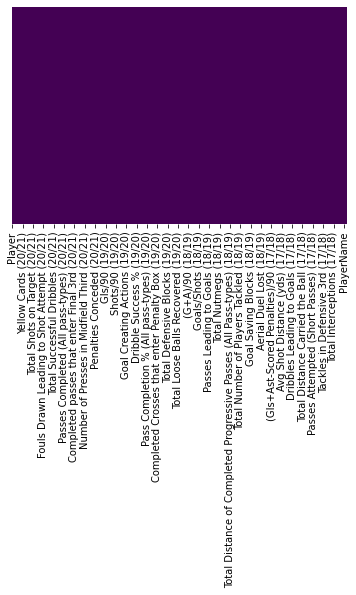

In [22]:
#observamos la dispersion de los datos nulos dentro nuestro heatmap
import seaborn as sns
sns.heatmap(data_union.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
data_union.dtypes

Player              object
Club                object
Age                  int64
Position            object
Nation              object
                     ...  
PlayerName          object
Foot                object
NationalTeamCaps     int64
MostRecentInjury     int64
Height (cm)          int64
Length: 549, dtype: object

In [33]:
aux=data_union.filter(regex=("MP.*")).columns
aux

Index(['MP (20/21)', 'MP (19/20)', 'MP (18/19)', 'MP (17/18)'], dtype='object')

In [36]:
data_union['Total_Games']=data_union.filter(regex=("MP.*")).sum(axis=1)
data_union.drop(labels=list(aux),axis=1,inplace=True)

In [37]:
data_union.head()

,Player,Club,Age,Position,Nation,Value,Contract Years Left,League,Starts (20/21),Min (20/21),...,Total Loose Balls Recovered (17/18),Aerial Duel Won (17/18),Aerial Duel Lost (17/18),% Aerial Duels Won (17/18),PlayerName,Foot,NationalTeamCaps,MostRecentInjury,Height (cm),Total_Games
0,KYLIAN MBAPPE,PARIS SAINT-GERMAIN,22,ATTACK,FRANCE,144000000,1,LIGUE 1,27.0,2380.0,...,98.0,1.0,4.0,20.0,KYLIAN MBAPPE,RIGHT,33,0,178,107.0
1,HARRY KANE,TOTTENHAM HOTSPUR,28,ATTACK,ENGLAND,108000000,3,PREMIER LEAGUE,35.0,3082.0,...,124.0,69.0,111.0,38.3,HARRY KANE,RIGHT,43,0,188,129.0
2,JADON SANCHO,MANCHESTER UNITED,21,ATTACK,ENGLAND,90000000,5,PREMIER LEAGUE,24.0,2062.0,...,57.0,3.0,14.0,17.6,JADON SANCHO,RIGHT,11,0,180,104.0
3,MOHAMED SALAH,LIVERPOOL FC,29,ATTACK,EGYPT,90000000,2,PREMIER LEAGUE,34.0,3078.0,...,219.0,19.0,58.0,24.7,MOHAMED SALAH,LEFT,67,0,175,145.0
4,NEYMAR,PARIS SAINT-GERMAIN,29,ATTACK,BRAZIL,90000000,4,LIGUE 1,15.0,1415.0,...,110.0,2.0,2.0,50.0,NEYMAR,RIGHT,102,1,175,70.0
